In [286]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [170]:
def Data_Dict(file_name):
    file = open(file_name, "r")
    next(file)
    Dict = {}
    n = 0

    for row in file:

        i,m,date,d,_ = row.split(",")

        if i in Dict.keys():
            _,D = d.split(":")
            D,_ = D.split(".")
            Dict[i].append((date,int(D))) 
        else:
            _,D = d.split(":")
            D,_ = D.split(".")
            Dict[i] = [(date,int(D))]

    file.close()
    return Dict

Dict = Data_Dict("Time_Series_Revenue_Data.csv")

for i in Dict.items():
    print(i)
    break

('"000028f8-80c2-57c2-a20e-4ad50d2417b4"', [('"2015-12-31"', 6880), ('"2014-12-31"', 11617), ('"2013-12-31"', 12638), ('"2011-12-31"', 1291443), ('"2010-08-31"', 4658056), ('"2006-12-31"', 1628519), ('"2005-12-31"', 1628519)])


In [171]:
def Avg_No_Years(Dict):
    
    Avg_Dict = {}
    s = 0
    for i in Dict.items():
        ID,data = i
        Avg_Dict[ID] = len(data)
        s += len(data)
        
    avg = s/len(Avg_Dict)
    
    return Avg_Dict,avg

Avg_Dict, avg = Avg_No_Years(Dict)
print(avg)

5.946565195332319


In [172]:
def Range_Years(Dict):
    
    Range_Dict = {}
    total_range = 0
    for i in Dict.items():
        ID,data = i
        Date = []
        for j in data:
            date,_ = j
            year,_,_ = date.split('-')
            Date.append(int(year[1:]))
            
        total_range +=  Date[0]-Date[-1]
        Range_Dict[ID] = (Date[-1],Date[0])
        
    total_range_avg = total_range/len(Range_Dict)
    return Range_Dict, total_range_avg

            
Revenue_Range_Years, range_avg = Range_Years(Dict)

print("Total Range Avg = ",range_avg)
n = 0
for i in Revenue_Range_Years.items():
    print(i)
    n += 1
    if n == 5:
        break
        


Total Range Avg =  7.267219685438864
('"000028f8-80c2-57c2-a20e-4ad50d2417b4"', (2005, 2015))
('"000064e3-2f41-5949-8ee6-e5c1221d3a55"', (2008, 2019))
('"00007d99-494a-5831-be00-5dd053b3763e"', (2009, 2017))
('"0000813e-3adf-52dd-8835-274b7babc2f2"', (2012, 2015))
('"00010568-9413-5c3d-b8b4-a03d4fc7dba6"', (2006, 2016))


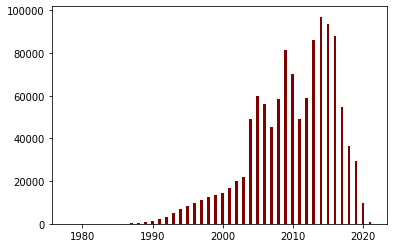

In [173]:
def No_of_Comp_EY(Dict):
    
    Count_Dict = {}
    years = []
    for i in Dict.items():
        ID,data = i
        for j in data:
            date,_ = j
            year,_,_ = date.split('-')
            year = int(year[1:])
            if year in Count_Dict.keys():
                Count_Dict[year] += 1
            else:
                years.append(year)
                Count_Dict[year] = 1
                
    years.sort()
                
    return Count_Dict,years

Revenue_Count_Dict,years = No_of_Comp_EY(Dict)
x = []          
for i in sorted(Revenue_Count_Dict.keys()) :
    x.append(Count_Dict[i])


plt.bar(list(Revenue_Count_Dict.keys()), list(Revenue_Count_Dict.values()), color ='maroon',width = 0.4)
plt.show()

        

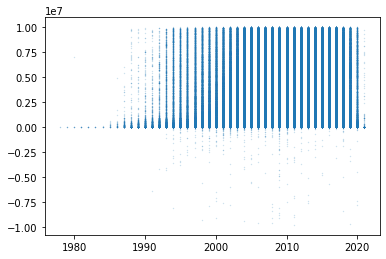

In [196]:
def Total_Data_Plot(Dict):
    
    Year = []
    mnemonic = []
    for i in Dict.items():
        ID,data = i
        for j in data:
            date,val = j
            year,_,_ = date.split('-')
            year = int(year[1:])
            Year.append(year)
            mnemonic.append(val)
            
    #plt.ylim(-1000000, 20000000)
    plt.scatter(Year,mnemonic,s = 0.1, alpha = 0.3)
    plt.show()
    
Total_Data_Plot(Dict)

In [186]:
def Range_Avg_Mnemonic(Dict):
    
    Range_Dict = {}
    total = 0
    for i in Dict.items():
        ID,data = i
        Val = []
        s = 0
        for j in data:
            _,val = j
            s += val
            Val.append(val)
        Val.sort()
        avg = s/len(Val)
        total += avg
        Range_Dict[ID] = (Val[0],Val[-1],int(avg))
        
    total_avg = total/len(Range_Dict)
    return Range_Dict, total_avg

            
Revenue_Range_Avg_Mnemonic, Avg = Range_Avg_Mnemonic(Dict)

print("Total_Avg = ", Avg)
n = 0
for i in Revenue_Range_Avg_Mnemonic.items():
    print(i)
    n += 1
    if n == 10:
        break


Total_Avg =  1919898.5531077313
('"000028f8-80c2-57c2-a20e-4ad50d2417b4"', (6880, 4658056, 1319667))
('"000064e3-2f41-5949-8ee6-e5c1221d3a55"', (1, 808586, 471885))
('"00007d99-494a-5831-be00-5dd053b3763e"', (14196, 5272323, 3485801))
('"0000813e-3adf-52dd-8835-274b7babc2f2"', (24369, 38554, 30892))
('"00010568-9413-5c3d-b8b4-a03d4fc7dba6"', (2, 7712468, 3717110))
('"00017f58-baec-51fd-9a90-e2acae968457"', (1, 1, 1))
('"0001e381-e787-576d-8183-56e0f5f4a895"', (250000, 1414886, 832443))
('"00023c5a-004b-53a9-b57f-fca73cca257f"', (1, 9376101, 1640945))
('"000242cd-b1fd-5249-b3b0-da97ccf80f79"', (9754715, 9754715, 9754715))
('"00025a53-1cdd-563a-8de7-e535c72bcc22"', (49437, 9892153, 4994102))


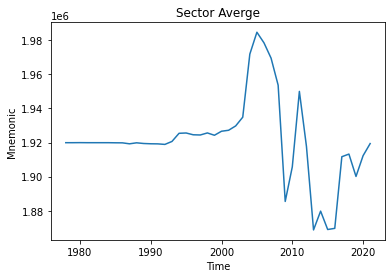

array([1919898., 1919898., 1919933., 1919897., 1919897., 1919897.,
       1919898., 1919838., 1919806., 1919240., 1919826., 1919427.,
       1919263., 1919204., 1918893., 1920626., 1925405., 1925588.,
       1924540., 1924419., 1925620., 1924258., 1926618., 1927187.,
       1929734., 1934861., 1971879., 1984703., 1978479., 1969515.,
       1953634., 1885423., 1905720., 1949996., 1917711., 1868718.,
       1879734., 1868958., 1869633., 1911668., 1913214., 1900089.,
       1912266., 1919382.])

In [190]:
def Sector_Avg(Dict,Range_Avg_Mnemonic,Range_Years):
    
    Full_Data_Dict = {}
    
    Min = []
    Max = []
    for i in Range_Years.values():
        Min.append(i[0])
        Max.append(i[1])
    
    Full_Range = list(range(min(Min), max(Max)+1))
    
    for i in Dict.items():
        ID,data = i
        mnemonic_data = np.zeros(Full_Range[-1]-Full_Range[0]+1)
        for j in data:
            date,val = j
            year,_,_ = date.split('-')
            year = int(year[1:])
            mnemonic_data[year - Full_Range[0]] = val
            
        mnemonic_data[mnemonic_data == 0] = Range_Avg_Mnemonic[ID][2]
        Full_Data_Dict[ID] = mnemonic_data
         
    sector_avg = np.zeros(Full_Range[-1]-Full_Range[0]+1)
    for i in Full_Data_Dict.values():
        sector_avg += i
        
    sector_avg /= len(Full_Data_Dict)
    
    plt.plot(Full_Range,sector_avg)
    plt.title("Sector Averge")
    plt.ylabel("Mnemonic")
    plt.xlabel("Time")
    plt.show()
    
    return np.around(sector_avg)

Revenue_Sector_Avg = Sector_Avg(Dict,Range_Avg_Dict,Revenue_Range_Years)

In [250]:
def Box_Plot(Dict):
    
    Year = []
    Single_Year = []
    Data = []
    Single_Data = []
    n = 0
    for i in Dict.values():
        entity_year = []
        entity_data = []
        for j in i:
            date,val = j
            year,_,_ = date.split('-')
            entity_year.append(int(year[1:]))
            Single_Year.append(int(year[1:]))
            entity_data.append(val)
            Single_Data.append(val)
        
        Year.append(np.array(entity_year))
        Data.append(np.array(entity_data))
        
        n += 1
        if n == 500:
            
            fig = plt.figure(figsize =(5, 5))
            ax = fig.add_axes([0, 0, 1, 1])
            bp = ax.boxplot(Single_Year)
            plt.yticks(fontsize=30)
            plt.show()
            
            fig2 = plt.figure(figsize =(5, 5))
            ax2 = fig2.add_axes([0, 0, 1, 1])
            bp2 = ax2.boxplot(Single_Data)
            plt.yticks(fontsize=30)
            plt.show()
            
            break
            

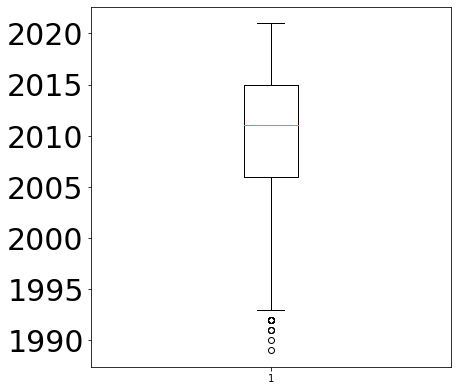

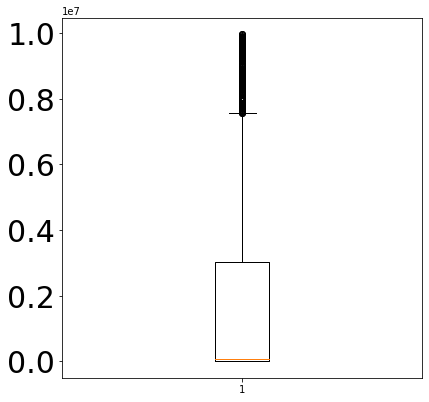

In [251]:
Box_Plot(Dict)

In [291]:
file = open("NET_DEBT_EBITDA_Data.csv", "r")
next(file)
NDE_Dict = {}
n = 0

for row in file:
    i,m,date,d = row.split(",")

    if i in NDE_Dict.keys():
        _,D = d.split(":")
        NDE_Dict[i].append((date,float(D[1:4])))
    else:
        _,D = d.split(":")
        D,_ = D.split(".")
        NDE_Dict[i] = [(date,float(D[1:4]))]
        

file.close()
n = 0
for i in NDE_Dict.items():
    print(i,"\n")
    n += 1
    if n == 10:
        break

('"00017f58-baec-51fd-9a90-e2acae968457"', [('"1997-12-27"', 0.0), ('"1996-12-28"', 0.9), ('"1995-12-30"', 1.2)]) 

('"0001e381-e787-576d-8183-56e0f5f4a895"', [('"2007-12-31"', 1.0), ('"2006-12-31"', 0.1), ('"2005-12-31"', 0.8)]) 

('"00023c5a-004b-53a9-b57f-fca73cca257f"', [('"2005-12-31"', 6.0), ('"2004-12-31"', 7.4), ('"2003-12-31"', 7.2), ('"2002-12-31"', 7.4), ('"2001-12-31"', 6.4), ('"2000-12-31"', 5.5), ('"1999-12-31"', 5.6), ('"1998-12-31"', 3.3), ('"1997-12-31"', 2.5), ('"1996-12-31"', 2.6), ('"1995-12-31"', 5.7)]) 

('"0004b29e-62ba-5f86-b3d5-4dcf0bd553b1"', [('"2020-12-31"', 4.0), ('"2019-12-31"', 11.0), ('"2018-12-31"', 31.0), ('"2017-12-31"', 20.0), ('"2016-12-31"', 2.0), ('"2015-12-31"', 2.8), ('"2014-12-31"', 5.5), ('"2013-12-31"', 6.7), ('"2012-12-31"', 11.0), ('"2011-12-31"', -7.0), ('"2010-12-31"', -2.0), ('"2009-12-31"', -2.0), ('"2008-12-31"', -0.0), ('"2007-12-31"', 17.0), ('"2006-12-31"', 1.8), ('"2005-12-31"', 0.8), ('"2004-12-31"', 1.1), ('"2003-12-31"', 4.8), (

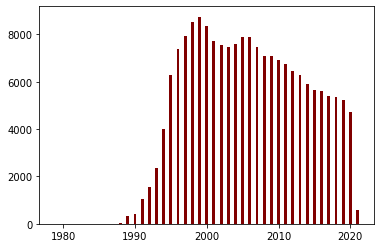

In [191]:
NDE_Count_Dict,years = No_of_Comp_EY(NDE_Dict)
x = []          
for i in sorted(NDE_Count_Dict.keys()) :
    x.append(NDE_Count_Dict[i])


plt.bar(list(NDE_Count_Dict.keys()), list(NDE_Count_Dict.values()), color ='maroon',width = 0.4)
plt.show()

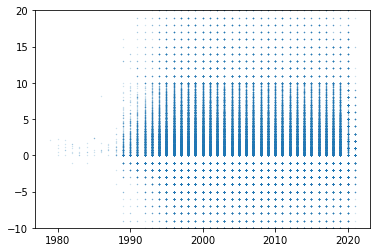

In [195]:
plt.ylim(-10, 20)
Total_Data_Plot(NDE_Dict)

Avg No.of Years Data  8.34043021158668
Total Range Avg =  7.545110632120705
('"00017f58-baec-51fd-9a90-e2acae968457"', (1995, 1997))
('"0001e381-e787-576d-8183-56e0f5f4a895"', (2005, 2007))
('"00023c5a-004b-53a9-b57f-fca73cca257f"', (1995, 2005))
('"0004b29e-62ba-5f86-b3d5-4dcf0bd553b1"', (1997, 2020))
('"000a6285-b1d9-5767-9a9e-dc9b370fbb89"', (1993, 2020))

 Total_NDE_Avg =  2.067319544801304
('"00017f58-baec-51fd-9a90-e2acae968457"', (0.0, 1.2, 0))
('"0001e381-e787-576d-8183-56e0f5f4a895"', (0.1, 1.0, 0))
('"00023c5a-004b-53a9-b57f-fca73cca257f"', (2.5, 7.4, 5))
('"0004b29e-62ba-5f86-b3d5-4dcf0bd553b1"', (-7.0, 31.0, 5))
('"000a6285-b1d9-5767-9a9e-dc9b370fbb89"', (0.8, 8.5, 2))
('"000dc6c4-56bc-5d97-8e41-b33828c103e9"', (0.0, 0.1, 0))
('"001478f6-4887-5135-9b07-f52dd610403a"', (-53.0, 34.0, 1))
('"001513c6-49ad-5948-9ead-32c2012266dd"', (-0.0, 1.2, 0))
('"00164871-7831-5f95-8d76-db5fd0675daf"', (-1.0, 0.5, 0))
('"00183c53-e9a4-5038-8c96-59fe3ffbaa41"', (0.0, 0.5, 0))


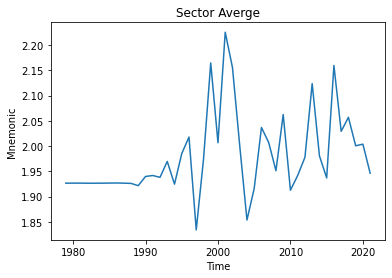

In [199]:
Avg_Dict, avg = Avg_No_Years(NDE_Dict)
print("Avg No.of Years Data ",avg)

NDE_Range_Years, NDE_range_avg = Range_Years(NDE_Dict)

print("Total Range Avg = ",NDE_range_avg)
n = 0
for i in NDE_Range_Years.items():
    print(i)
    n += 1
    if n == 5:
        break
        
        
NDE_Range_Years, range_avg = Range_Years(NDE_Dict)
NDE_Range_Avg_Mnemonic, Avg = Range_Avg_Mnemonic(NDE_Dict)
print("\n Total_NDE_Avg = ", Avg)
n = 0
for i in NDE_Range_Avg_Mnemonic.items():
    print(i)
    n += 1
    if n == 10:
        break
NDE_Sector_Avg = Sector_Avg(NDE_Dict,NDE_Range_Avg_Mnemonic,NDE_Range_Years)

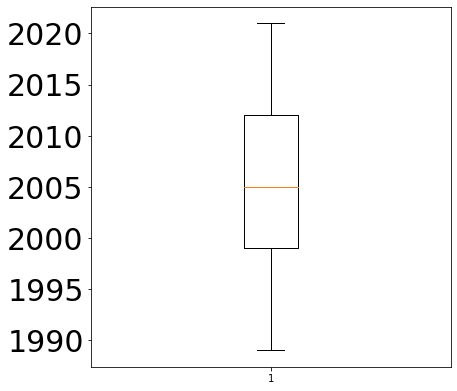

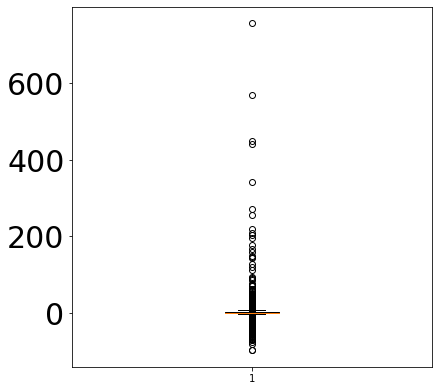

In [252]:
Box_Plot(NDE_Dict)